E21CSEU0173
Anand Chauhan
EB09
SML Lab 10

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset from sklearn
dataset = load_breast_cancer()
print("Shape of the data is:", dataset.data.shape)



Shape of the data is: (569, 30)


In [56]:
# Do all the necessary pre-processing on the data.

# Convert the data into a dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
print("Shape of the dataframe is:", df.shape)

# Check for missing values
print("Missing values in the dataframe:", df.isnull().sum().sum())

# Check for the data distribution
print("Data distribution:", df.var())

# Check for the correlation
print("Correlation of the dataframe:", df.corr())



Shape of the dataframe is: (569, 30)
Missing values in the dataframe: 0
Data distribution: mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst p

In [31]:
# drop the columns with low variance
dfclean = df.drop(['worst fractal dimension', 'worst texture', 'worst smoothness', 'worst symmetry', 'worst concavity', 'worst concave points', 'worst compactness'], axis=1)
print("Shape of the dataframe after dropping the columns with low variance:", dfclean.shape)


Shape of the dataframe after dropping the columns with low variance: (569, 23)


In [32]:
# Apply PCA with required number of principal component.

scaler = StandardScaler()
scaler.fit(dfclean)
scaled_data = scaler.transform(dfclean)

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)


In [33]:
# Print the different component values.
print("Different component values:", pca.components_)
print("Shape of the different component values:", pca.components_.shape)


Different component values: [[ 0.26385097  0.11100018  0.27116094  0.26873213  0.13314531  0.23911967
   0.27368173  0.28687042  0.1303609   0.03115152  0.25602908  0.02795389
   0.25941353  0.25403602  0.01603941  0.1684642   0.15554476  0.20074702
   0.04722569  0.09690854  0.26826477  0.27517774  0.26766869]
 [-0.2009152  -0.03196661 -0.18044619 -0.19095793  0.19556154  0.18230605
   0.10881786  0.00762472  0.2142388   0.37905867 -0.01845705  0.1735906
  -0.00116012 -0.07892668  0.27547138  0.30070863  0.26953224  0.22024241
   0.25683043  0.34863916 -0.19622222 -0.17446472 -0.18973817]]
Shape of the different component values: (2, 23)


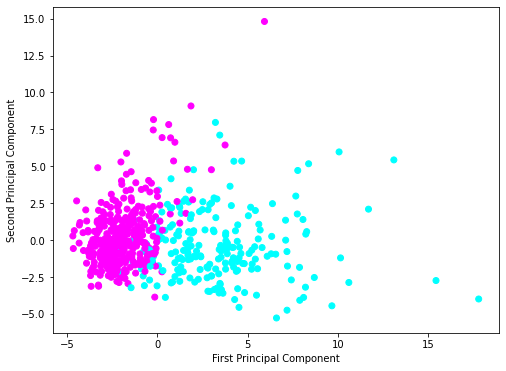

In [34]:
# Plotting the data (2D)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=data.target, cmap='cool')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [35]:
# Calculate the variance ratio.
print("Variance ratio:", pca.explained_variance_ratio_)
print("Sum of the variance ratio:", np.sum(pca.explained_variance_ratio_))

Variance ratio: [0.46938774 0.21469469]
Sum of the variance ratio: 0.6840824352488895


Lab 10 Question 2

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data2 = load_wine()
print("Shape of the data is:", data2.data.shape)


Shape of the data is: (178, 13)


In [47]:
# Do all the necessary pre-processing on the data.

# Convert the data into a dataframe
dfwine = pd.DataFrame(data2.data, columns=data2.feature_names)
print("Shape of the dataframe is:", dfwine.shape)

# Check for missing values
print("Missing values in the dataframe:", dfwine.isnull().sum().sum())

# Check for the data distribution
print("Data distribution of the dataframe:", dfwine.var())

# Check for the correlation
print("Correlation of the dataframe:", dfwine.corr())


Shape of the dataframe is: (178, 13)
Missing values in the dataframe: 0
Data distribution of the dataframe: alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
dtype: float64
Correlation of the dataframe:                                alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcali

In [48]:
# Drop the columns with low variance
dfwine = dfwine.drop(['proline', 'color_intensity', 'ash', 'magnesium', 'alcalinity_of_ash'], axis=1)
print("Shape of the dataframe after dropping the columns with low variance:", dfwine.shape)
    

Shape of the dataframe after dropping the columns with low variance: (178, 8)


In [49]:
# Apply PCA with required number of principal component.

scaler = StandardScaler()
scaler.fit(dfwine)
scaled_data = scaler.transform(dfwine)

pca2 = PCA(n_components=2)
pca2.fit(scaled_data)
x_pca_2 = pca2.transform(scaled_data)
# print(x_pca_2)


In [50]:
# Print the different component values.
print("Different component values:", pca2.components_)
print("Shape of the different component values:", pca2.components_.shape)
    

Different component values: [[-0.10217067  0.27349804 -0.43104467 -0.464323    0.31621716 -0.35096882
  -0.33049152 -0.42540283]
 [-0.6767538  -0.49915794 -0.1962034  -0.10259975  0.10976042 -0.18770285
   0.44090492  0.04632825]]
Shape of the different component values: (2, 8)


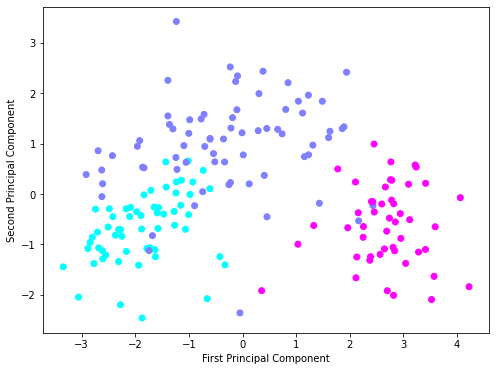

In [51]:
# Plotting the data (2D)
plt.figure(figsize=(8,6))
plt.scatter(x_pca_2[:,0], x_pca_2[:,1], c=data2.target, cmap='cool')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
    

In [62]:
# Calculate the variance ratio.
print("Variance ratio:", *pca2.explained_variance_ratio_)
print("Sum of the variance ratio:", np.sum(pca2.explained_variance_ratio_))

Variance ratio: 0.5080651371072453 0.1617922548660508
Sum of the variance ratio: 0.6698573919732962


In [53]:
# apply linear or logistic regression to predict the quality of wine along with the accuracy rate.

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_pca_2, data2.target, test_size=0.2, random_state=42)

# Apply logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [54]:
# Predict the test data
y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [58]:
# Calculate the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.3f}%")


Accuracy: 94.444%
